In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
df = pd.read_csv('./monthly.csv')
df.head()

,Date,BID,GDP,Close,Inflation
0,1/1/2000,8775833333,476636,16078025,4.02
1,2/1/2000,891125,476636,1686578571,4.02
2,3/1/2000,9499166667,476636,1605657143,4.02
3,4/1/2000,8076315789,476636,1469030556,4.02
4,5/1/2000,8154166667,476636,1312652273,4.02


In [11]:
df = df.drop(['Date'], axis=1)
df.columns

Index(['BID', 'GDP', 'Close', 'Inflation'], dtype='object')

In [12]:
df.describe()

,BID,GDP,Close,Inflation
count,1.870000e+02,1.870000e+02,1.870000e+02,187.000000
mean,4.571109e+09,1.048567e+06,2.648335e+09,6.831925
std,3.693440e+09,6.765439e+05,2.714684e+09,2.823134
min,7.300000e+01,1.238700e+04,9.776000e+03,3.770000
25%,8.435450e+04,4.939340e+05,3.429825e+07,4.020000
50%,5.439615e+09,8.342180e+05,1.568084e+09,6.370000
75%,8.184452e+09,1.835821e+06,5.067115e+09,9.300000
max,9.846818e+09,2.308018e+06,9.922605e+09,12.110000


In [13]:
from typing import Tuple
from sklearn.base import BaseEstimator, TransformerMixin

def find_boxplot_boundaries(
    col: pd.Series, whisker_coeff: float = 1.5
) -> Tuple[float, float]:
   
    
    Q1 = col.quantile(0.25)
    Q3 = col.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - whisker_coeff * IQR
    upper = Q3 + whisker_coeff * IQR
    return lower, upper

class BoxplotOutlierClipper(BaseEstimator, TransformerMixin):
    def __init__(self, whisker_coeff: float = 1.5):
        self.whisker = whisker_coeff
        self.lower = None
        self.upper = None

    def fit(self, X: pd.Series):
        self.lower, self.upper = find_boxplot_boundaries(X, self.whisker)
        return self

    def transform(self, X):
        return X.clip(self.lower, self.upper)

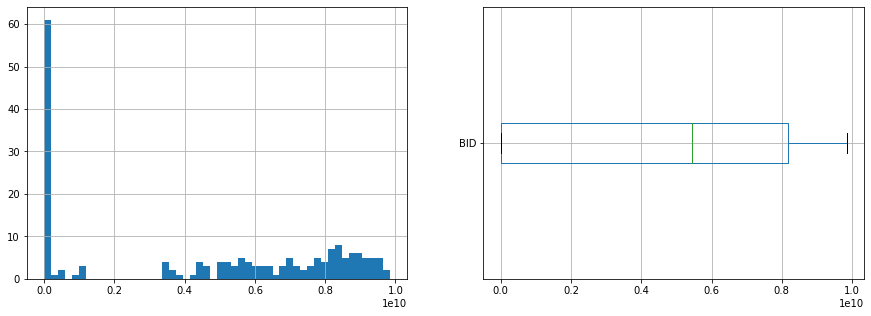

In [14]:
BID= BoxplotOutlierClipper().fit_transform(df["BID"])
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
BID.hist(bins=50, ax=axes[0])
BID.to_frame().boxplot(ax=axes[1], vert=False);

In [15]:
!pip install openpyxl
import openpyxl as ol


In [16]:
BID.to_excel('./BID.xlsx', sheet_name='Sheet1', index = False)

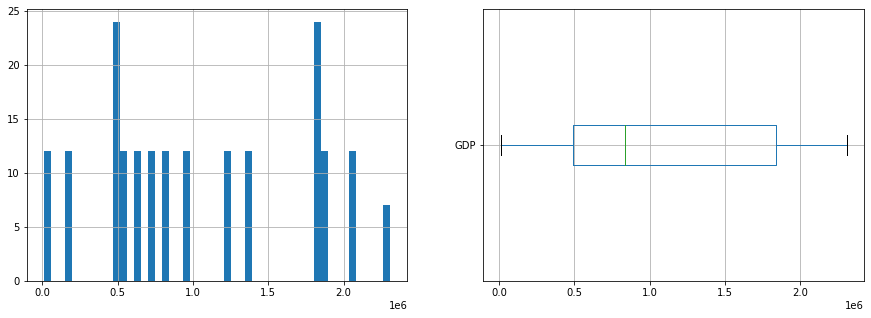

In [17]:
GDP= BoxplotOutlierClipper().fit_transform(df["GDP"])
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
GDP.hist(bins=50, ax=axes[0])
GDP.to_frame().boxplot(ax=axes[1], vert=False);

In [18]:
GDP.to_excel('./GDP.xlsx', sheet_name='Sheet1', index = False)

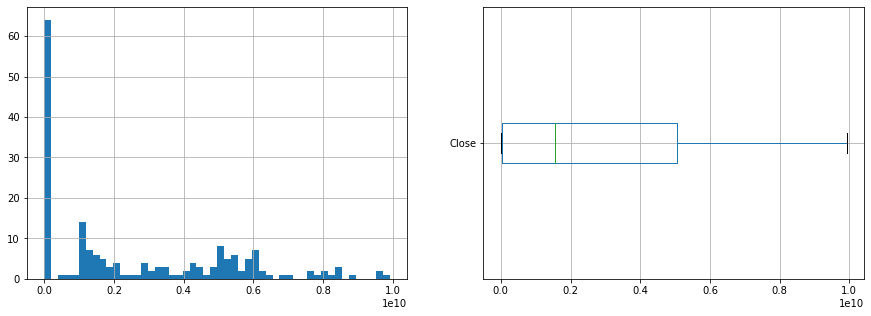

In [19]:
Close= BoxplotOutlierClipper().fit_transform(df["Close"])
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
Close.hist(bins=50, ax=axes[0])
Close.to_frame().boxplot(ax=axes[1], vert=False);

In [20]:
Close.to_excel('./Close.xlsx', sheet_name='Sheet1', index = False)

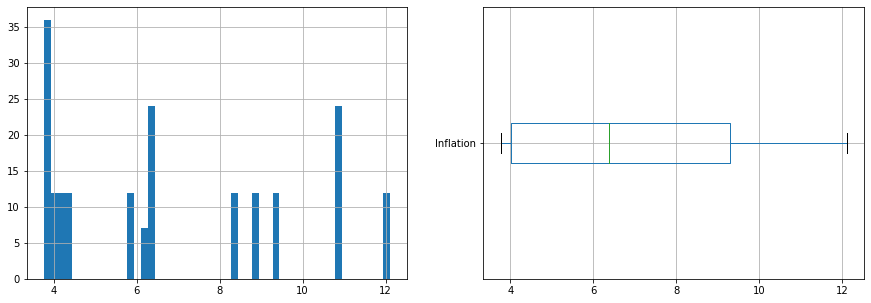

In [21]:
Inflation= BoxplotOutlierClipper().fit_transform(df["Inflation"])
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
Inflation.hist(bins=50, ax=axes[0])
Inflation.to_frame().boxplot(ax=axes[1], vert=False);

In [22]:
Inflation.to_excel('./Inflation.xlsx', sheet_name='Sheet1', index = False)